## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

# Dataset download

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

2025-09-15 18:51:38.005128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757962298.027815    3449 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757962298.034519    3449 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [2]:
cifar100_train_images.shape

(50000, 32, 32, 3)

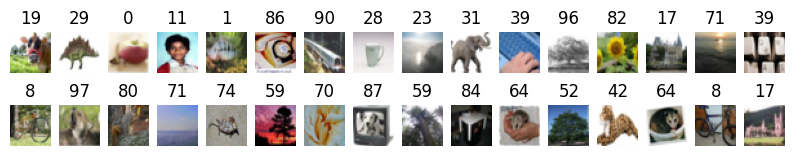

In [3]:
plt.figure(figsize=(10, 15))
for i in range(32):
    plt.subplot(16, 16, i+1)
    image, label = cifar100_train_images[i], cifar100_train_labels[i]
    plt.imshow(image)
    plt.title(label[0])
    plt.axis('off')
plt.show()

## Check Data Range

In [4]:
np.max(cifar100_train_images[1])

255

## Normalize Data Range

In [5]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

In [6]:
np.max(cifar100_train_images[1])

1.0

## Reshaping Data

- Our data shape is already (32, 32, 3) which CNNs support

In [7]:
cifar100_train_images.shape

(50000, 32, 32, 3)

## One Hot Encoding Labels

In [8]:
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels)

cifar100_test_labels_one_hot.shape, cifar100_train_labels_one_hot.shape

((10000, 100), (50000, 100))

In [9]:
cifar100_train_labels_one_hot[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [10]:
print("Training images shape:", cifar100_train_images.shape)
print("Testing images shape:", cifar100_test_images.shape)
print("Training labels shape:", cifar100_train_labels_one_hot.shape)
print("Testing labels shape:", cifar100_test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


## Model Building

- Deep CNN Model:

Architecture:

- Input (32, 32, 3)

- Conv2D(32, 3x3, ReLU, same padding)
- BatchNormalization()
- Conv2D(32, 3x3, ReLU, same padding)
- MaxPooling2D(2x2)
- Dropout(0.25)

- Conv2D(64, 3x3, ReLU, same padding)
- BatchNormalization()
- Conv2D(64, 3x3, ReLU, same padding)
- Dropout(0.25)

- Conv2D(128, 3x3, ReLU, same padding)
- BatchNormalization()
- Conv2D(128, 3x3, ReLU, same padding)
- Dropout(0.25)

- Conv2D(256, 3x3, ReLU, same padding)
- BatchNormalization()
- Conv2D(256, 3x3, ReLU, same padding)
- Dropout(0.25)

- Flatten()

- Dense(512, ReLU)
- BatchNormalization()
- Dropout(0.5)

- Dense(256, ReLU)
- BatchNormalization()
- Dropout(0.5)

- Dense(100, Softmax)

**Features:**
- Progressive filter increase: 32→64→128→256
- Batch normalization after each conv block
- Same padding to preserve spatial dimensions
- Only one MaxPooling layer to maintain feature resolution
- Regularization through dropout and weight decay
- AdamW optimizer with learning rate scheduling

In [11]:
cnn_model = keras.Sequential(
    [
        keras.layers.Input(shape=(32, 32, 3)),
        #
        keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.25),
        #
        keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        keras.layers.Dropout(0.25),
        #
        keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        keras.layers.Dropout(0.25),
        #
        keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
        keras.layers.Dropout(0.25),
        #
        keras.layers.Flatten(),
        #
        keras.layers.Dense(512, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        #
        keras.layers.Dense(256, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        #
        keras.layers.Dense(100, activation="softmax"),
    ]
)

cnn_model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001),
    loss="categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average="macro", name="f1-score"),
        keras.metrics.CategoricalAccuracy(name="accuracy"),
    ],
)

cnn_model.summary()

I0000 00:00:1757962311.263493    3449 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 34,889,220 (133.09 MB)

 Trainable params: 34,886,724 (133.08 MB)

 Non-trainable params: 2,496 (9.75 KB)

## Train Deep CNN model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 100 (early stopping controls actual run)  
  - Batch size: 16
  - Validation split of 10%
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [12]:
%%time

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_f1-score',
    patience=10,
    mode='max',
    restore_best_weights=True
)

model_checkpoint_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cnn_model_weights.weights.h5',
    monitor='val_f1-score',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_f1-score',
    factor=0.5,
    patience=5,
    mode='max',
    min_lr=1e-7,
    verbose=1
)

print("Training CNN Model...")
h = cnn_model.fit(
    x=cifar100_train_images,
    y=cifar100_train_labels_one_hot,
    validation_split=0.1,
    batch_size=32,
    epochs=200,
    verbose=2,
    callbacks=[early_stopping, model_checkpoint_cnn, lr_scheduler]
)
print("Training completed.")

Training CNN Model...
Epoch 1/200


I0000 00:00:1757962324.356112    3485 service.cc:148] XLA service 0x798910002d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757962324.356158    3485 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757962325.225520    3485 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757962333.045645    3485 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_f1-score improved from -inf to 0.08846, saving model to best_cnn_model_weights.weights.h5
1407/1407 - 50s - 36ms/step - accuracy: 0.0554 - f1-score: 0.0510 - loss: 4.4426 - val_accuracy: 0.1188 - val_f1-score: 0.0885 - val_loss: 3.7521 - learning_rate: 0.0010
Epoch 2/200

Epoch 2: val_f1-score did not improve from 0.08846
1407/1407 - 20s - 14ms/step - accuracy: 0.1221 - f1-score: 0.1127 - loss: 3.7488 - val_accuracy: 0.0286 - val_f1-score: 0.0191 - val_loss: 13.7480 - learning_rate: 0.0010
Epoch 3/200

Epoch 3: val_f1-score improved from 0.08846 to 0.19736, saving model to best_cnn_model_weights.weights.h5
1407/1407 - 22s - 15ms/step - accuracy: 0.1725 - f1-score: 0.1609 - loss: 3.4289 - val_accuracy: 0.2206 - val_f1-score: 0.1974 - val_loss: 3.2363 - learning_rate: 0.0010
Epoch 4/200

Epoch 4: val_f1-score improved from 0.19736 to 0.25242, saving model to best_cnn_model_weights.weights.h5
1407/1407 - 21s - 15ms/step - accuracy: 0.2192 - f1-score: 0.2070 - loss: 3.1713 - 

## Model Evaluation

In [13]:
history_df = pd.DataFrame(h.history)
history_df.shape, history_df.columns

((49, 7),
 Index(['accuracy', 'f1-score', 'loss', 'val_accuracy', 'val_f1-score',
        'val_loss', 'learning_rate'],
       dtype='object'))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

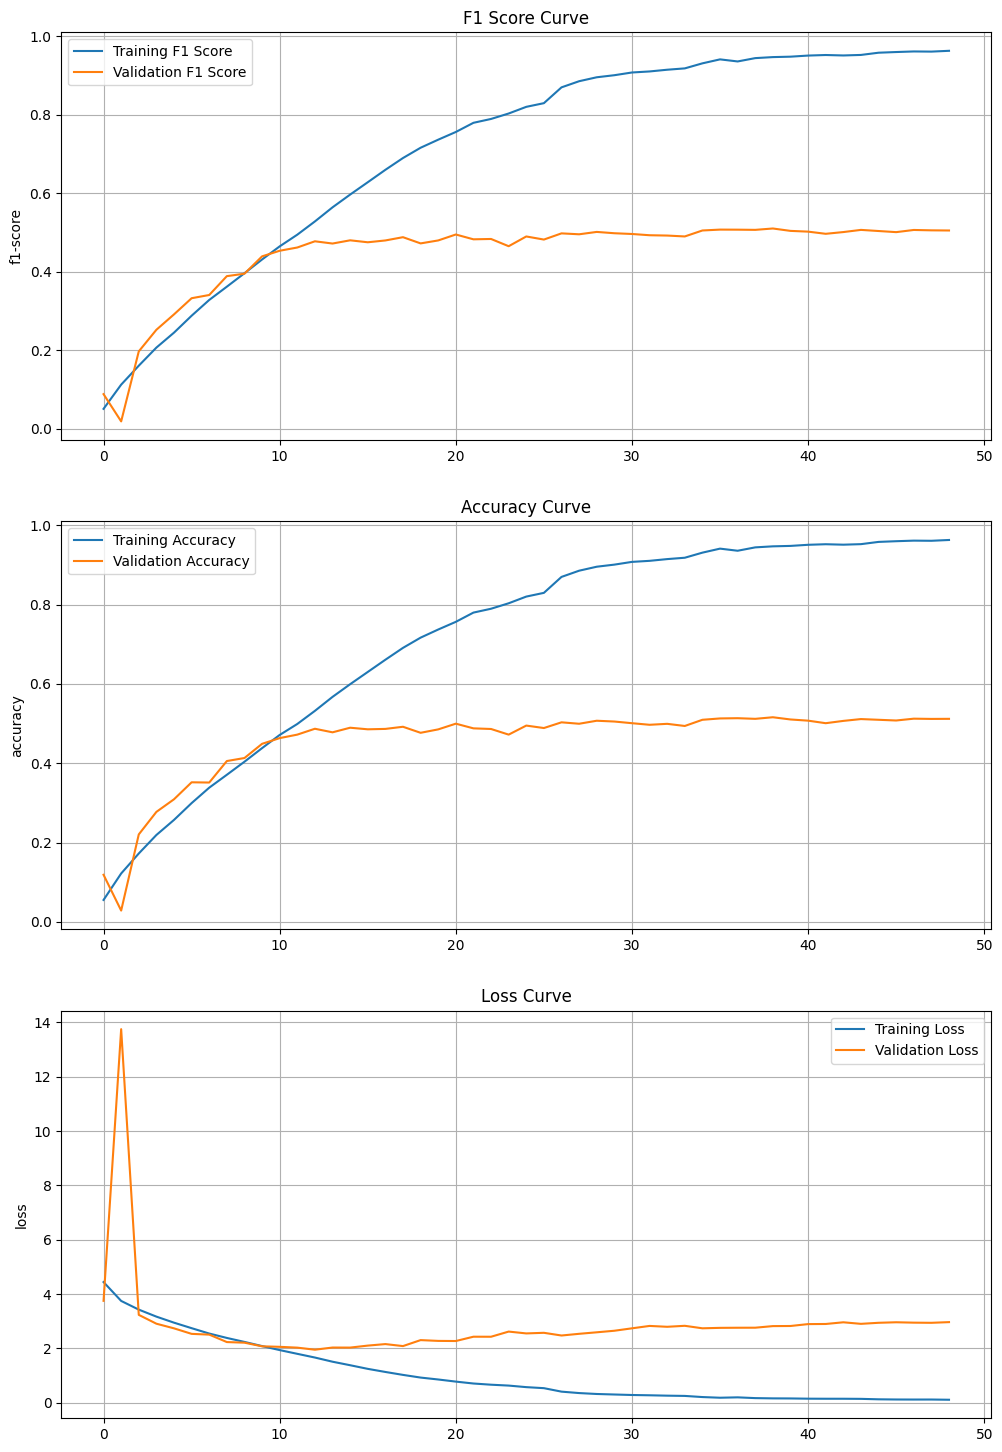

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.lineplot(history_df['f1-score'], label='Training F1 Score')
sns.lineplot(history_df['val_f1-score'], label='Validation F1 Score')
plt.grid()
plt.title("F1 Score Curve")

plt.subplot(3, 1, 2)
sns.lineplot(history_df['accuracy'], label='Training Accuracy')
sns.lineplot(history_df['val_accuracy'], label='Validation Accuracy')
plt.grid()
plt.title("Accuracy Curve")

plt.subplot(3, 1, 3)
sns.lineplot(history_df['loss'], label='Training Loss')
sns.lineplot(history_df['val_loss'], label='Validation Loss')
plt.grid()
plt.title("Loss Curve")

plt.show()

In [15]:
cnn_model.load_weights('best_cnn_model_weights.weights.h5')

y_pred = cnn_model.predict(cifar100_test_images)

metrics = cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot)
{
    'Loss': metrics[0],
    'Accuracy': metrics[1],
    'F1 Score': metrics[2]
}

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5268 - f1-score: 0.5178 - loss: 2.7197


{'Loss': 2.719881057739258,
 'Accuracy': 0.5202155709266663,
 'F1 Score': 0.5210000276565552}

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(cifar100_test_labels, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       100
           1       0.68      0.61      0.64       100
           2       0.30      0.30      0.30       100
           3       0.23      0.21      0.22       100
           4       0.28      0.34      0.30       100
           5       0.49      0.48      0.49       100
           6       0.55      0.61      0.58       100
           7       0.63      0.52      0.57       100
           8       0.71      0.60      0.65       100
           9       0.63      0.62      0.63       100
          10       0.36      0.32      0.34       100
          11       0.51      0.35      0.41       100
          12       0.50      0.53      0.52       100
          13       0.63      0.46      0.53       100
          14       0.36      0.38      0.37       100
          15       0.51      0.45      0.48       100
          16       0.58      0.52      0.55       100
          17       0.67    

In [18]:
cm = confusion_matrix(cifar100_test_labels, np.argmax(y_pred, axis=1))

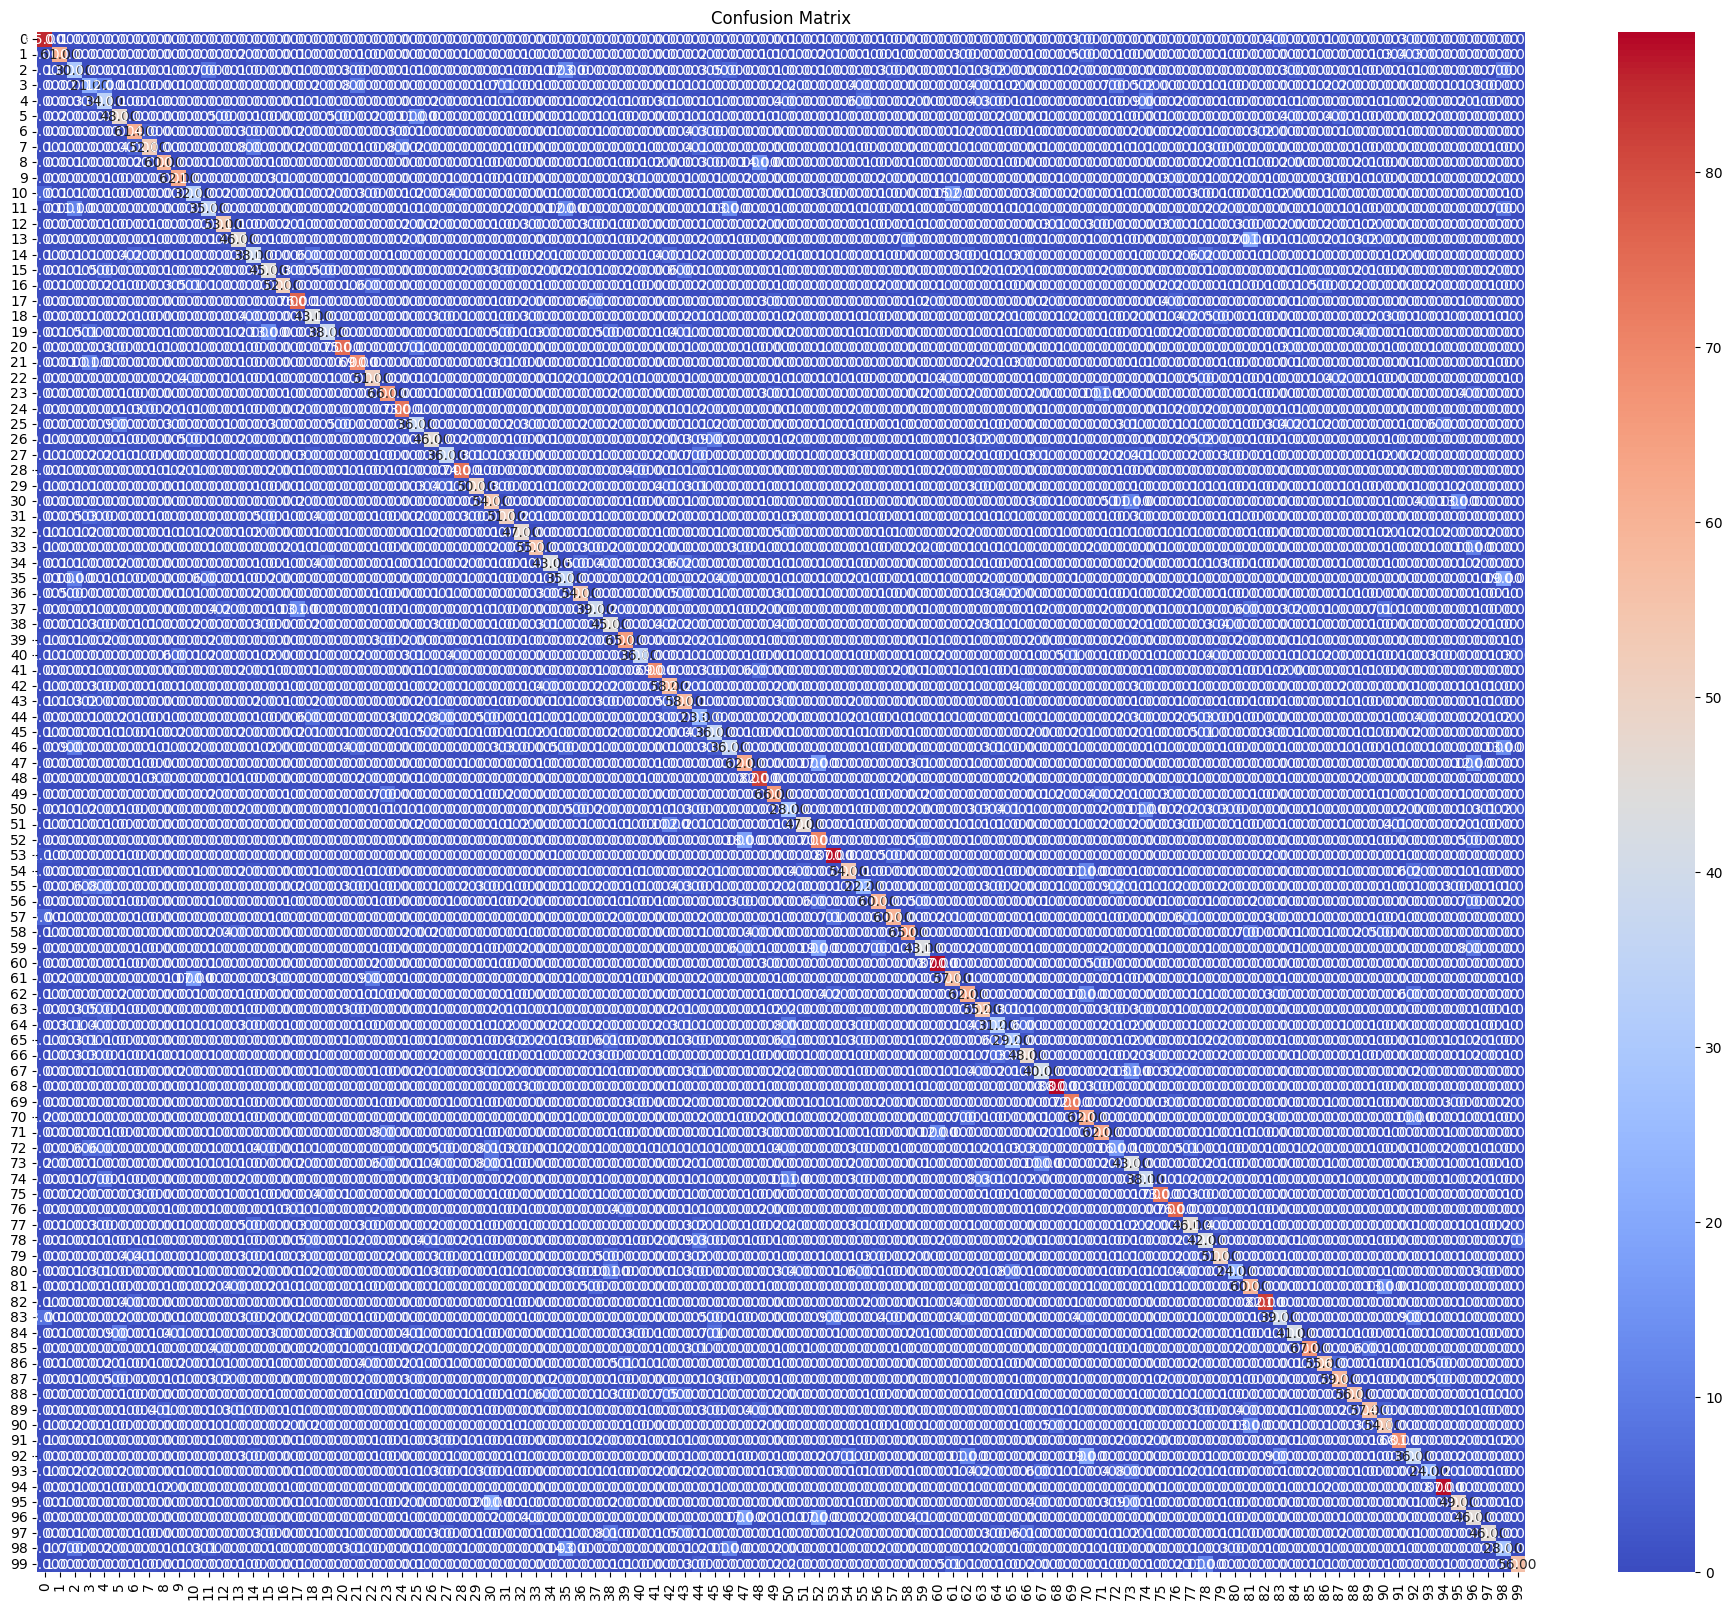

In [25]:
plt.figure(figsize=(24, 20))
sns.heatmap(cm, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Confusion Matrix")
plt.show()

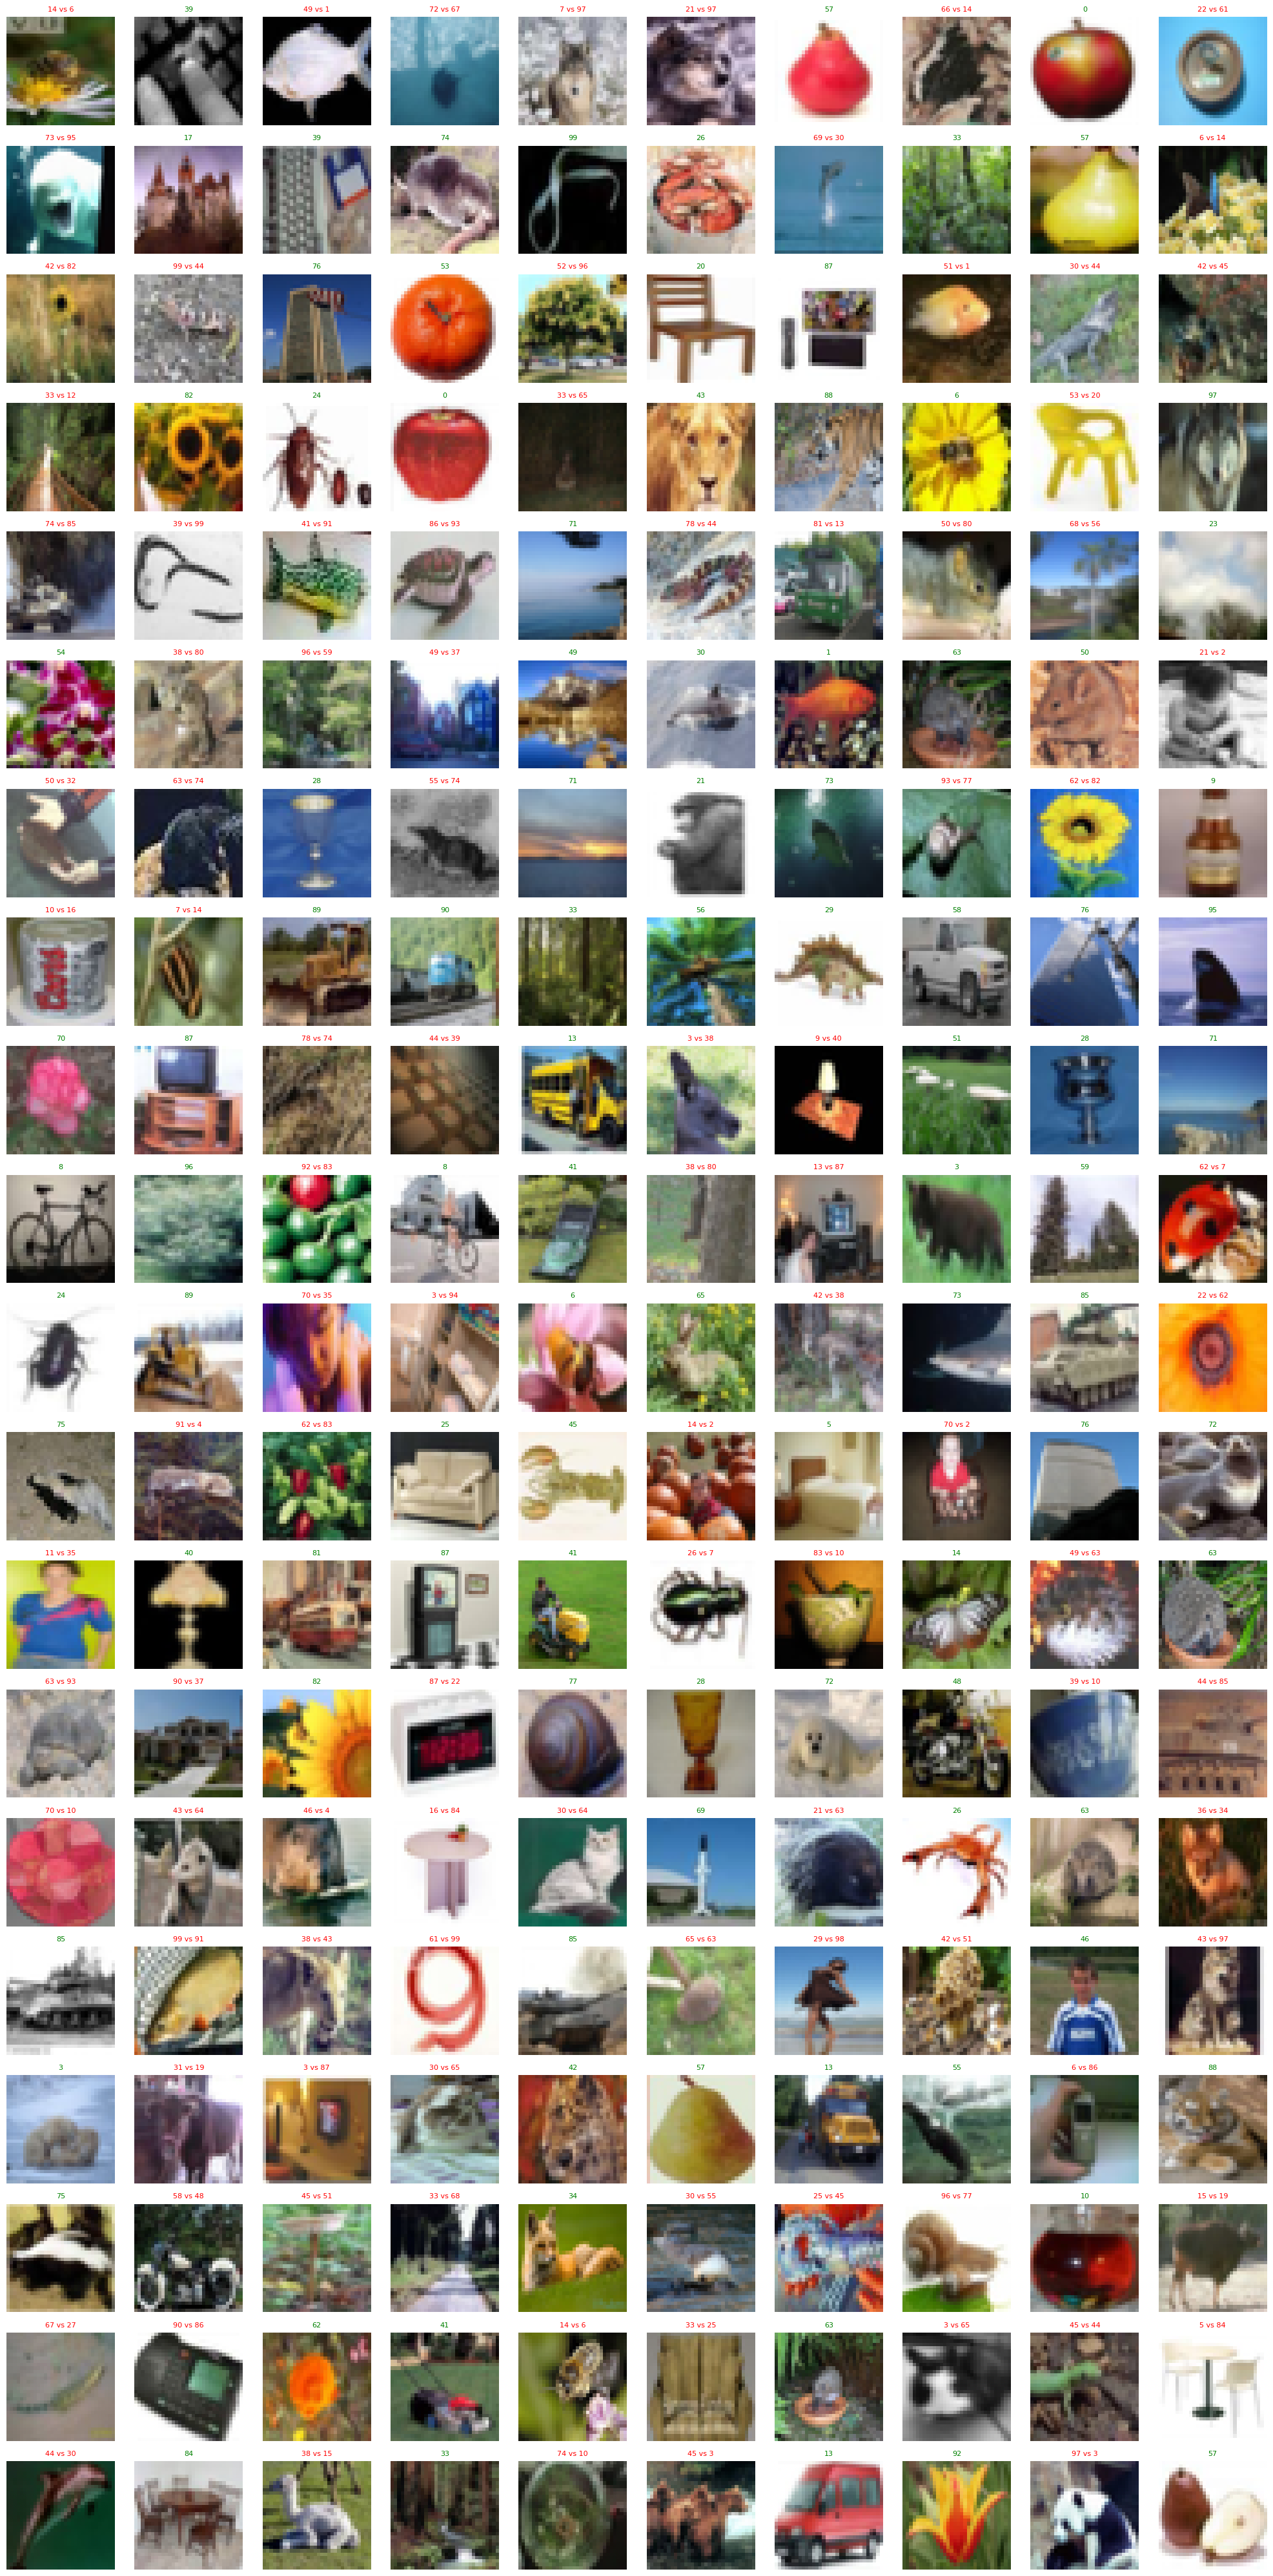

In [20]:
import random

# Get predicted and true labels
y_true = cifar100_test_labels.flatten()
y_pred_labels = np.argmax(y_pred, axis=1)

# Find correct and incorrect indices
correct_indices = np.where(y_true == y_pred_labels)[0]
incorrect_indices = np.where(y_true != y_pred_labels)[0]

# Randomly select 100 from each
random.seed(42)
selected_correct = random.sample(list(correct_indices), min(100, len(correct_indices)))
selected_incorrect = random.sample(list(incorrect_indices), min(100, len(incorrect_indices)))

# Combine and shuffle for grid display
selected_indices = selected_correct + selected_incorrect
random.shuffle(selected_indices)

plt.figure(figsize=(20, 40))
for idx, test_idx in enumerate(selected_indices):
    plt.subplot(20, 10, idx + 1)
    plt.imshow(cifar100_test_images[test_idx])
    pred_label = y_pred_labels[test_idx]
    true_label = y_true[test_idx]
    if pred_label == true_label:
        plt.title(f"{pred_label}", color='green', fontsize=8)
    else:
        plt.title(f"{pred_label} vs {true_label}", color='red', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Project Summary & Conclusion

This project successfully implemented a deep learning CNN model for classifying images from the CIFAR-100 dataset.

**Summary of Work:**

1.  **Data Preparation:** The CIFAR-100 dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with CNN.
2.  **Model Development:** Developed CNN Model with deep architecture and best practices for CNNs
3.  **Model Training:** The model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained model was evaluated on the test set. Performance metrics (loss, accuracy and f1-score) were calculated, and the training history was visualized. Confusion matrix was generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

- **Model Performance:** The deep CNN model achieved competitive performance on the challenging CIFAR-100 dataset, demonstrating the effectiveness of the multi-layer architecture with batch normalization and dropout regularization.

- **Architecture Effectiveness:** The progressive increase in filter counts (32→64→128→256) combined with same padding and batch normalization layers proved effective for feature extraction from the 32x32 color images.

- **Regularization Impact:** The combination of dropout (0.25 in conv layers, 0.5 in dense layers), batch normalization, and early stopping successfully prevented overfitting while maintaining good generalization capability.

- **Training Optimization:** The use of AdamW optimizer with weight decay, learning rate scheduling, and F1-score monitoring for early stopping resulted in stable and efficient training convergence.

- **Dataset Complexity:** CIFAR-100's 100-class classification task proved more challenging than typical datasets, requiring deeper architecture and careful regularization to achieve reasonable performance across all classes.

- **Visualization Insights:** The confusion matrix and prediction analysis revealed class-specific performance variations, with some visually similar classes showing higher misclassification rates, which is expected for fine-grained image classification.

**Conclusion:**
This project successfully demonstrated the application of modern CNN techniques to a complex multi-class image classification problem. The implementation showcased best practices including data preprocessing, advanced model architecture design, comprehensive training strategies, and thorough evaluation methodologies. The results highlight the importance of proper regularization and monitoring techniques when working with challenging datasets like CIFAR-100.